# Ex01 Binary classifier. SVM. Decision tree

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
data = pd.read_csv('../data/am_pm.csv')
data.head()

,Unnamed: 0,date,is_pm,is_am,target,y,predict
0,0,2020-04-17,2,21,work,1,0
1,1,2020-04-18,68,1,weekend,0,1
2,2,2020-04-19,15,18,weekend,0,1
3,3,2020-04-20,23,2,work,1,1
4,4,2020-04-21,25,0,work,1,1


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   date        35 non-null     object
 2   is_pm       35 non-null     int64 
 3   is_am       35 non-null     int64 
 4   target      35 non-null     object
 5   y           35 non-null     int64 
 6   predict     35 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 2.0+ KB


## 1. Preprocessing and logreg visualization

<Axes: xlabel='is_pm', ylabel='is_am'>

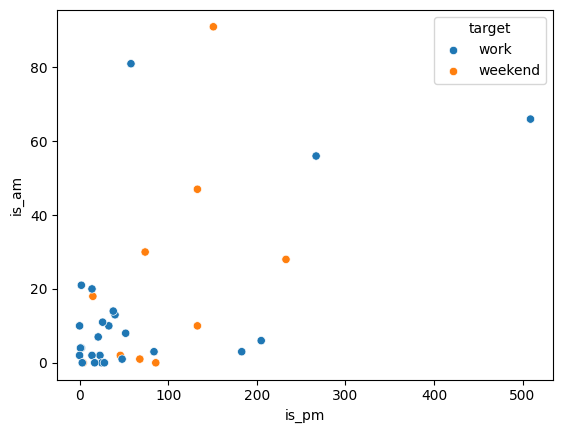

In [48]:
sns.scatterplot(data = data, x = 'is_pm', y = 'is_am', hue = 'target')

In [49]:
X = data[['is_am','is_pm']]
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.4)
logreg = LogisticRegression(fit_intercept=False,random_state=21)
logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, random_state=21)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


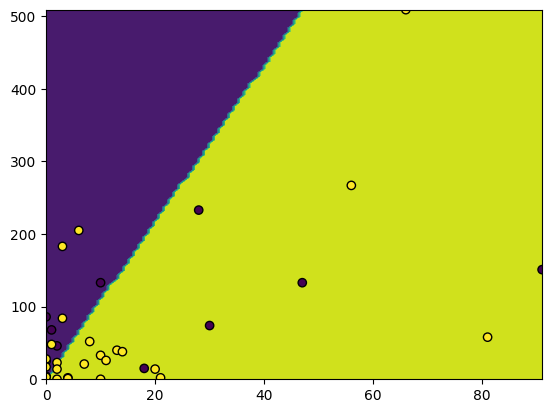

In [50]:
xx, yy = np.meshgrid(np.linspace(X['is_am'].min(), X['is_am'].max(), 100), 
                     np.linspace(X['is_pm'].min(), X['is_pm'].max(), 100))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
display = DecisionBoundaryDisplay(xx0=xx,xx1=yy,response=Z)
display.plot()
display.ax_.scatter(data['is_am'],data['is_pm'],c=data['y'], edgecolor='black')
plt.show()

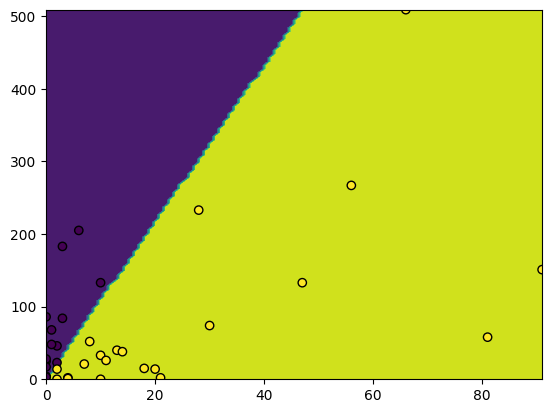

In [51]:
display = DecisionBoundaryDisplay(xx0=xx,xx1=yy,response=Z)
display.plot()
display.ax_.scatter(data['is_am'],data['is_pm'],c=logreg.predict(X), edgecolor='black')
plt.show()

## 2. Standardizing and logreg

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # нормализация данных

In [53]:
logreg = LogisticRegression(fit_intercept=False, random_state=21)
logreg.fit(X_scaled, y)

LogisticRegression(fit_intercept=False, random_state=21)

In [54]:
predictions = logreg.predict(X_scaled)

In [55]:
metrics.accuracy_score(data['y'], predictions)

0.7428571428571429

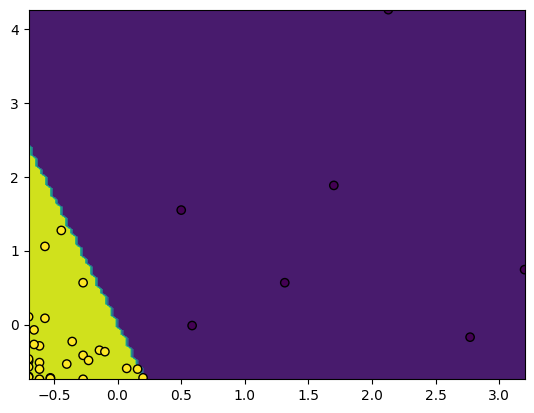

In [56]:
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100), 
                     np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]) # предсказание для каждой точки на графике
Z = Z.reshape(xx.shape)
display = DecisionBoundaryDisplay(xx0=xx,xx1=yy,response=Z)
display.plot()
display.ax_.scatter(X_scaled[:, 0],X_scaled[:, 1],c=predictions, edgecolor='black')
plt.show()

## 3. SVM

In [57]:
clf = SVC(probability=True, random_state=21)

In [58]:
clf.fit(X_scaled,y)
clf_pred = clf.predict(X_scaled)
metrics.accuracy_score(data['y'], clf_pred)

0.7428571428571429

### Different kernels

In [59]:
svc_linear = SVC(kernel='linear', probability=True,random_state=21)
svc_linear.fit(X_scaled,y)
svc_linear_pred = svc_linear.predict(X_scaled)
metrics.accuracy_score(data['y'], svc_linear_pred)


0.7142857142857143

In [60]:
svc_rbf = SVC(kernel='rbf', probability=True,random_state=21)
svc_rbf.fit(X_scaled,y)
svc_rbf_pred = svc_rbf.predict(X_scaled)
metrics.accuracy_score(data['y'], svc_rbf_pred)

0.7428571428571429

In [61]:
svc_poly = SVC(kernel='poly', probability=True,random_state=21)
svc_poly.fit(X_scaled,y)
svc_poly_pred = svc_poly.predict(X_scaled)
metrics.accuracy_score(data['y'], svc_poly_pred)

0.7428571428571429

### Plot result

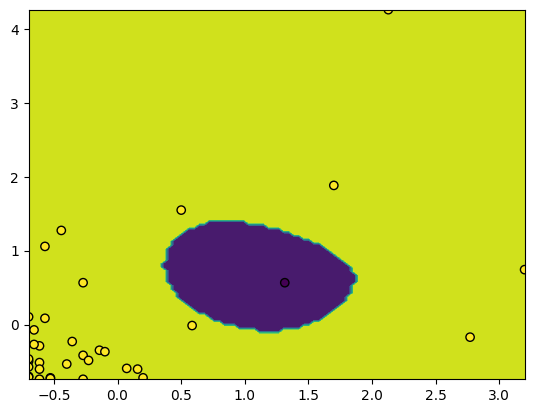

In [62]:
model = clf
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100),
                     np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
display = DecisionBoundaryDisplay(xx0=xx,xx1=yy,response=Z)
display.plot()
display.ax_.scatter(X_scaled[:, 0],X_scaled[:, 1],c=clf_pred, edgecolor='black')
plt.show()

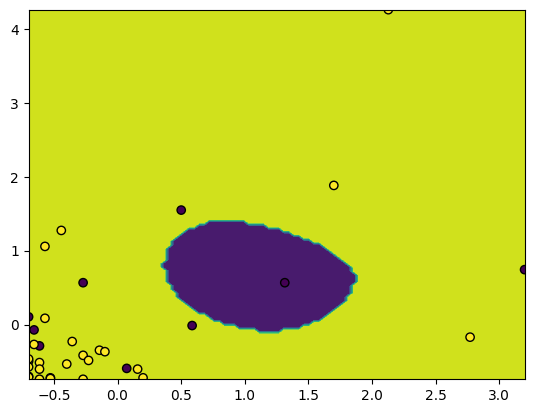

In [63]:
display = DecisionBoundaryDisplay(xx0=xx,xx1=yy,response=Z)
display.plot()
display.ax_.scatter(X_scaled[:, 0],X_scaled[:, 1],c=data['y'], edgecolor='black')
plt.show()

## 4. Decision tree

In [64]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 42)
tree.fit(X_scaled,y)
tree_pred = tree.predict(X_scaled)

In [65]:
metrics.accuracy_score(data['y'], tree_pred)

0.9428571428571428

### Different max_depth

In [66]:
tree_5 = DecisionTreeClassifier(max_depth = 5, random_state = 42)
tree_5.fit(X_scaled,y)
tree_5_pred = tree_5.predict(X_scaled)

In [67]:
metrics.accuracy_score(data['y'], tree_5_pred)

0.9714285714285714

In [68]:
tree_3 = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree_3.fit(X_scaled,y)
tree_3_pred = tree_3.predict(X_scaled)

In [69]:
metrics.accuracy_score(data['y'], tree_3_pred)

0.8857142857142857

### Plot with decisions boundary

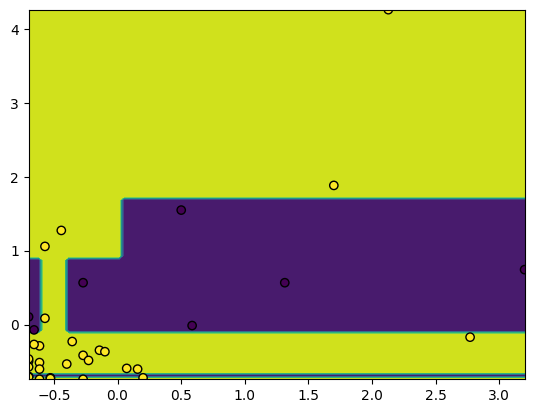

In [70]:
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
display = DecisionBoundaryDisplay(xx0=xx,xx1=yy,response=Z)
display.plot()
display.ax_.scatter(X_scaled[:, 0],X_scaled[:, 1],c=tree_pred, edgecolor='black')
plt.show()

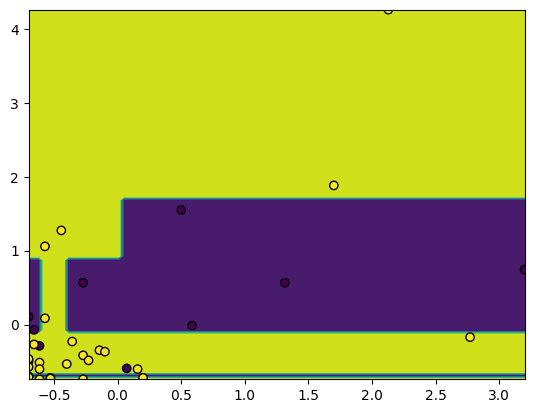

In [71]:
display = DecisionBoundaryDisplay(xx0=xx,xx1=yy,response=Z)
display.plot()
display.ax_.scatter(X_scaled[:, 0],X_scaled[:, 1],c=data['y'], edgecolor='black')
plt.show()

### Plot decision tree

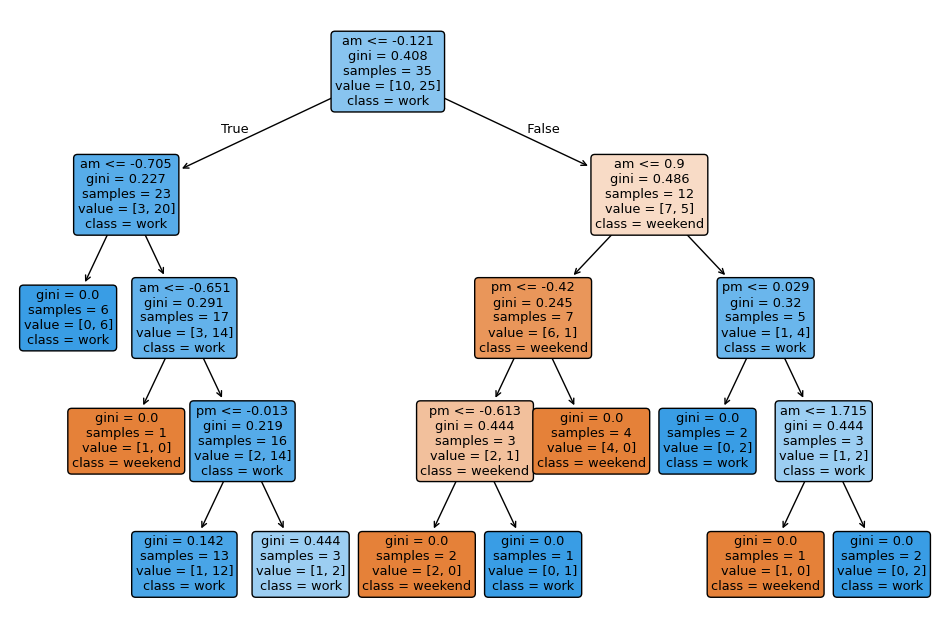

In [72]:
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=['pm', 'am'], class_names=['weekend', 'work'], rounded=True)
plt.show()

* How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

4